# File I/O 

NOTE: You can copy each of the snippets below in a separate Python File to test File I/O outside Jupyter Notebooks.

## Text files (.txt)
### Reading Files

In [2]:
# Read whole file as one
filename = 'test.txt' # make sure this file exists in the same folder as your script
with open(filename) as file_obj:
    # open() = return object representing file in Python
    # file_obj = variable where file object is stored
    file_content = file_obj.read() # read from file object
print('File content between lines:')
print('==========')
print(file_content)
print('==========')

File content between lines:
This is FoCSP.
This is Maths.

This is it!

Bye.


In [3]:
# Read file line by line and print it
print('File content is:')
with open('test.txt') as f:
    # Iterating over object == Iterating over lines
    for line in f:
        # lines have "newline" (\n) at end!
        print('Next line is:', line)

File content is:
Next line is: This is FoCSP.

Next line is: This is Maths.

Next line is: 

Next line is: This is it!

Next line is: 

Next line is: Bye.


In [4]:
# Make sure you understand what's the difference here!
# Read file line by line and print it.
print('File content is:')
with open('test.txt') as f:
    # Iterating over object == Iterating over lines
    for line in f:
        # lines have "newline" (\n) at end!
        print('Next line is:', line.rstrip())

File content is:
Next line is: This is FoCSP.
Next line is: This is Maths.
Next line is: 
Next line is: This is it!
Next line is: 
Next line is: Bye.


In [5]:
# Read lines in file into list
filename = 'test.txt' # make sure this file exists in the same folder as your script
with open(filename) as file:
      # store lines in list
    lines = file.readlines()
    
# do you see what's at the end of each line-string?
print(f'Lines in file: {lines}')

Lines in file: ['This is FoCSP.\n', 'This is Maths.\n', '\n', 'This is it!\n', '\n', 'Bye.']


In [6]:
# Print all lines in file until quit is found, then cancel with message
# Option A
filename = 'test_quit.txt'

print('File Content:')
with open(filename) as f:
    # Iterating over object = Iterating over lines
    for line in f:
        stripped = line.rstrip()
        
        if stripped.lower() == 'quit':
            print('Found Quit! Canceling.')
            break
        
        print('Next line is:', stripped)

File Content:
Next line is: This is FoCSP.
Next line is: This is Maths.
Found Quit! Canceling.


In [7]:
# Print all lines in file until quit is found, then cancel with message
# Option B
filename = 'test_quit.txt'
with open(filename) as f:
    lines = f.readlines()

print('File Content:')
for line in lines:
    stripped = line.rstrip()
    if stripped.lower() == 'quit':
        print('Found Quit! Canceling.')
        break
    
    print('Next line is:', stripped)

File Content:
Next line is: This is FoCSP.
Next line is: This is Maths.
Found Quit! Canceling.


### Writing Files

In [8]:
# Writing simple file
filename = 'test_write.txt' 
with open(filename, 'w') as file_obj:
    # Note the newline char (\n)
    file_obj.write('I do not love Programming.\n')
    file_obj.write('I do not like Maths.\n')
    file_obj.write('I do not like anything.\n')

In [9]:
# Appending text to files
filename = 'test_append.txt' 
with open(filename, 'a') as file_obj:
    # Note the newline char (\n)
    file_obj.write('Appended!\n')

In [10]:
# Writing a list to a file, with additional info
filename = 'test_fruits.txt' 
fruits = ['Apple', 'Orange', 'Ananas']

with open(filename, 'w') as file:
    # Note the newline char (\n)
    file.write('This is all the fruits i bought:\n')
    
    for fruit in fruits:
        file.write(f'I bought an {fruit}!\n')
    
    file.write(f'That makes {len(fruits)}.')

In [11]:
# Writing user input to a file
# Here, we collect usernames and write them directly to a file

print('Enter your name. Entering "Quit" stops input.')
with open('test_input.txt', 'w') as f:
    f.write('The following names were entered by users:\n')
    while True:
        user_name = input('Please enter your username: ')
        
        if user_name.lower() == 'quit':
            break
        
        f.write(f'{user_name}\n')
        

Enter your name. Entering "Quit" stops input.


Please enter your username:  denis
Please enter your username:  quit


## CSV Files (.csv)

In [12]:
# Do not forget to run this!
import csv # usually, this goes on top of the file

### Reading Data

#### csv.reader

In [13]:
file_path = 'students.csv'
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    rows = list(csv_reader)
print(rows)

[['Mat.Nr.', 'Vorname', 'Nachname', 'Punkte'], ['1234', 'Martina', 'Muster', '10'], ['1313', 'Max', 'Muster', '12'], ['4242', 'Test', 'Student', '16'], ['2424', 'Test', 'Studentin', '14']]


#### csv.DictReader

In [14]:
file_path = 'students.csv'
with open(file_path, 'r') as file:
    csv_dict_reader = csv.DictReader(file, delimiter=',')
    row_dicts = list(csv_dict_reader)
print(row_dicts)

[{'Mat.Nr.': '1234', 'Vorname': 'Martina', 'Nachname': 'Muster', 'Punkte': '10'}, {'Mat.Nr.': '1313', 'Vorname': 'Max', 'Nachname': 'Muster', 'Punkte': '12'}, {'Mat.Nr.': '4242', 'Vorname': 'Test', 'Nachname': 'Student', 'Punkte': '16'}, {'Mat.Nr.': '2424', 'Vorname': 'Test', 'Nachname': 'Studentin', 'Punkte': '14'}]


### Writing Data

#### csv.writer

In [15]:
file_path = 'students_out.csv'
students = [['1234', 'Martina', 'Muster', '10'],
            ['1313', 'Max', 'Muster', '12'],
            ['4242', 'Test', 'Student', '16'],
            ['2424', 'Test', 'Studentin', '14']]

with open(file_path, 'w') as file:
    header = ['Mat.Nr.', 'Vorname', 'Nachname', 'Punkte']
    writer = csv.writer(file)
    writer.writerow(header) # write header
    writer.writerows(students) # write data


#### csv.DictWriter

In [16]:
file_path = 'students_out.csv'
students = [
    {'Mat.Nr.': 1234, 'Vorname': 'Martina', 'Nachname': 'Muster', 'Punkte': 10},
    {'Mat.Nr.': 1313, 'Vorname': 'Max', 'Nachname': 'Muster', 'Punkte': 12},
    {'Mat.Nr.': 4242, 'Vorname': 'Test', 'Nachname': 'Student', 'Punkte': 16},
    {'Mat.Nr.': 2424, 'Vorname': 'Test', 'Nachname': 'Studentin', 'Punkte': 14}]

with open(file_path, 'w') as file:
    columns = ['Mat.Nr.', 'Vorname', 'Nachname', 'Punkte']
    writer = csv.DictWriter(file, fieldnames=columns)
    writer.writeheader()	# write header
    writer.writerows(students) # write data
    

### Appending Data to existing File

#### csv.writer

In [17]:
file_path = 'students_out.csv'
new_students = [['3333', 'New', 'Guy', '23'], 
                ['4444', 'New', 'Girl', '24']]
with open(file_path, 'a') as file:
    columns = ['Mat.Nr.', 'Vorname', 'Nachname', 'Punkte']
    writer = csv.writer(file)
    writer.writerows(students) # write data
    

# Pandas

In [19]:
import pandas as pd

## Create DataFrames manually

In [20]:
data = {'population': {'California': 38332521,
                       'New York': 19651127, 
                       'Florida': 19552860},
        'area': {'California': 423967, 
                 'New York': 141297, 
                 'Florida': 170312}}
df = pd.DataFrame(data)
df

,population,area
California,38332521,423967
New York,19651127,141297
Florida,19552860,170312


In [21]:
data = [['California', 423967, 38332521], 
        ['New York', 141297, 19651127],
        ['Florida', 170312, 19552860]]
df = pd.DataFrame(data, columns=['state','area','population'])
df

,state,area,population
0,California,423967,38332521
1,New York,141297,19651127
2,Florida,170312,19552860


## Load DataFrames

In [22]:
import pandas as pd
df = pd.read_csv('states.csv')
df

,state,population,area
0,California,38332521.0,423967.0
1,Texas,26448193.0,695662.0
2,New York,19651127.0,141297.0
3,Florida,19552860.0,170312.0
4,New Jersey,9288994.0,NaN
5,Hawaii,0.0,0.0
6,Illinois,12882135.0,149995.0


## Accessing rows and columns

### Accessing rows with index and loc

In [23]:
row_with_index_3 = df.loc[3]
row_with_index_3 # or display(row_with_index_3)

state            Florida
population    19552860.0
area            170312.0
Name: 3, dtype: object

### Accessing columns

In [24]:
area_1 = df['area']
area_2 = df.area
area_3 = df.loc[:, 'area']
print(f'Is it True that all three options return the same thing?')
print(f'It is: {area_1 is area_2} {area_1 is area_2} {area_2 is area_3}')
print(f'Show the resulting column (a "Series" object):')
display(area_1)

Is it True that all three options return the same thing?
It is: True True True
Show the resulting column (a "Series" object):


0    423967.0
1    695662.0
2    141297.0
3    170312.0
4         NaN
5         0.0
6    149995.0
Name: area, dtype: float64

## Filtering columns with values

### What rows have states with population larger than 25 millions?

In [25]:
df_pop = df[df.population > 25000000]
# same as: df.loc[df.population > 25000000]
df_pop

,state,population,area
0,California,38332521.0,423967.0
1,Texas,26448193.0,695662.0


In [26]:
# Show boolean mask that "cuts out": 
df.population > 25000000
# all True values are included in filtering (see above), the False values are excluded

0     True
1     True
2    False
3    False
4    False
5    False
6    False
Name: population, dtype: bool

### What rows have states with less than 15 million people and less than 200000 km² area?

In [27]:
df_pop_area = df[(df.population < 15000000) & (df.area < 200000)]
# oder: df.loc[(df.population < 15000000) & (df.area < 200000)]
df_pop_area

,state,population,area
5,Hawaii,0.0,0.0
6,Illinois,12882135.0,149995.0


#### What are the names of these states?  

In [28]:
names_states = df_pop_area.state
# df_pop_area['state']
names_states # this is now a "Series" object

5      Hawaii
6    Illinois
Name: state, dtype: object

## Aggregating DataFrames and columns

### What is the the total area of all states?

In [29]:
sum_area = df['area'].sum() # or df.area.sum()
sum_area

1581233.0

## String operations and filtering the string columns

### Select states with "New" in their name

In [30]:
df_states_with_new = df[df['state'].str.contains('New')]
# or: df[df.state.str.contains('New')] 
df_states_with_new

,state,population,area
2,New York,19651127.0,141297.0
4,New Jersey,9288994.0,NaN


### Arithmetic operations on columns

### Compute area in „squared miles“ instead of km² (ratio 0,386).

In [31]:
area_sqm = df['area'] * 0.386 # or: df.area * 0.386   
area_sqm # this is, again a "Series" representing a column element

0    163651.262
1    268525.532
2     54540.642
3     65740.432
4           NaN
5         0.000
6     57898.070
Name: area, dtype: float64

#### Direct combination with aggregation is possible

In [32]:
(df['area'] * 0.386).sum()

610355.938

## Missing data or data with errors

### Replace missing data ("Nan"/"Na" values) in the area column with a default value of 25000 km².

In [33]:
df.loc[:, 'area'] = df['area'].fillna(25000)
# other options: 
# df['area'] = df['area'].fillna(25000)
# df = df.fillna({'area': 25000})
print('Notice that the NaN value visible in the previous outputs is now gone!')
df

Notice that the NaN value visible in the previous outputs is now gone!


,state,population,area
0,California,38332521.0,423967.0
1,Texas,26448193.0,695662.0
2,New York,19651127.0,141297.0
3,Florida,19552860.0,170312.0
4,New Jersey,9288994.0,25000.0
5,Hawaii,0.0,0.0
6,Illinois,12882135.0,149995.0


### Delete all rows with data errors in population and area.
In this case: all rows with 0 values.

In [34]:
df = df[(df.area > 0) & (df.population > 0)].copy()
# ignore the copy() here - we use it to avoid warnings later
print('Notice that the row with values 0 in the previous outputs is now gone!')
df 

Notice that the row with values 0 in the previous outputs is now gone!


,state,population,area
0,California,38332521.0,423967.0
1,Texas,26448193.0,695662.0
2,New York,19651127.0,141297.0
3,Florida,19552860.0,170312.0
4,New Jersey,9288994.0,25000.0
6,Illinois,12882135.0,149995.0


## Add columns

### Add column with population in millions.
Round on an integer.

In [35]:
df['pop_in_mil'] = df['population'] / 1000000
df['pop_in_mil'] = round(df['pop_in_mil'])
# or: df.loc[:, 'pop_in_mil'] = round(df['population'] / 1000000)
df

,state,population,area,pop_in_mil
0,California,38332521.0,423967.0,38.0
1,Texas,26448193.0,695662.0,26.0
2,New York,19651127.0,141297.0,20.0
3,Florida,19552860.0,170312.0,20.0
4,New Jersey,9288994.0,25000.0,9.0
6,Illinois,12882135.0,149995.0,13.0


### Add a column with population density.
Round on two decimal places.

In [36]:
df['pop_density'] = round(df['population'] / df['area'], 2)
# or: df.loc[:, 'pop_density'] = round(df['population'] / df['area'], 2)
df

,state,population,area,pop_in_mil,pop_density
0,California,38332521.0,423967.0,38.0,90.41
1,Texas,26448193.0,695662.0,26.0,38.02
2,New York,19651127.0,141297.0,20.0,139.08
3,Florida,19552860.0,170312.0,20.0,114.81
4,New Jersey,9288994.0,25000.0,9.0,371.56
6,Illinois,12882135.0,149995.0,13.0,85.88


## Plotting

<AxesSubplot:title={'center':'Population Density per km^2'}, xlabel='state'>

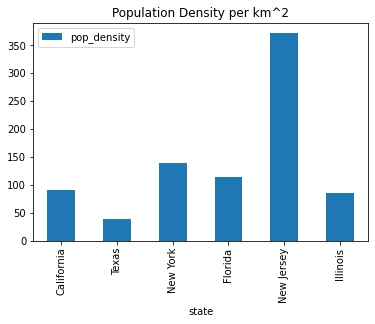

In [37]:
# This returns an "axis" object, which is technically part of a Figure-object in python.
ax = df.plot(x='state', y='pop_density', title='Population Density per km^2', kind='bar')
ax

## Store preprocessed DataFrame as a new csv file.

In [38]:
df.to_csv('states_processed.csv', index=False) # index=False excludes the index column (as our index-column here is not useful)
# One could also manually define the separator between the cells as following:
# df.to_csv('states_new.csv', sep=';', index=False)